# 18.S190/6.S090 Problem Set 6 Solutions

## Problem 1 (2+5+5+5 points)

Simpson’s method for integration of ODEs $\frac{dv}{dt} = f(v, t)$ is given by:

$$
\frac{v^{n+1} - v^{n-1}}{2\Delta t} = \frac{1}{6} \left[ f(v^{n+1}, t^{n+1}) + 4f(v^{n}, t^{n}) + f(v^{n-1}, t^{n-1}) \right].
$$

1. Is the method explicit or implicit?
2. Using a Taylor series analysis, calculate the local truncation error for the method. Specifically, what is the order of accuracy?
3. Is the method convergent? Why or why not?
4. Plot the linear-stability region ($f(v,t) = \lambda v$) for this integration method as a function of $\lambda \Delta t$ in the complex plane. For purely real, negative $\lambda < 0$, what is the largest timestep $\Delta t$ that can be taken while remaining stable for this method?

### Solutions:

**(1.1)** This is an **implicit** method because $f(v^{n+1})$ appears on the right-hand side.  (So you will need to solve for $v^{n+1}$, possibly a complicated system of equations depending on $f$.)

**(1.2)** Suppose we plug in an exact solution $v^n = v(n\Delta t)$, where $v(t)$ satisfies $dv/dt = f(v,t)$.  We now plug in the Taylor expansion around $n\Delta t$:
$$
v^{n\pm 1} = v^n \pm v'^n \Delta t + v'' ^n \Delta t^2/2 \pm v''' ^n \Delta t^3/6 + v'''' ^n \Delta t^4/24 + O(\Delta t^5)
$$
which gives:
$$
\frac{v^{n+1} - v^{n-1}}{2\Delta t} = v'^n + v''' ^n \Delta t^2/6 + O(\Delta t^4)
$$
on the left-hand side, where all of the other terms cancel.  For the right-hand side, let $g(t) = f(v(t), t)$ and let $g^n = g(n\Delta t)$.  Then, Taylor-expanding $g^{n\pm 1}$ exactly as for $v^{n\pm 1}$, the right-hand side becomes:
$$
\frac{1}{6} \left[ g^{n+1}) + 4g^{n} + g^{n-1} \right] = g^n + g'' ^n \Delta t^2/6 + O(\Delta t^4)
$$
where all of the other terms cancel.   The error is the difference between the right- and left-hand sides.  Since $v'^n = g^n$ by assumption ($v$ satisfies the ODE), we are left with:
$$
\text{error} = \left( v''' ^n - g'' ^n \right)\Delta t^2/6  O(\Delta t^4)
$$
But $v'(t) = f(v(t), t) = g(t)$, so $v''' = g''$ and hence the $v''' ^n - g'' ^n$ cancels!  We are left with a $\boxed{O(\Delta t^4)} local truncation error!

***Not required:*** It's always a good idea to do a quick numerical check to make sure we didn't make an algebra error.  For example, we could check this numerically for a simple test function, e.g. let $v(t) = e^{-t^2}$ and let $f(v,t) = dv/dt = -2t v$.  We'll then try plotting the numerical difference between the left- and right-hand sides around $t =n\Delta t = 1$ as a function of $\Delta t$.   As expected, it shows $O(\Delta t^4)$ error.

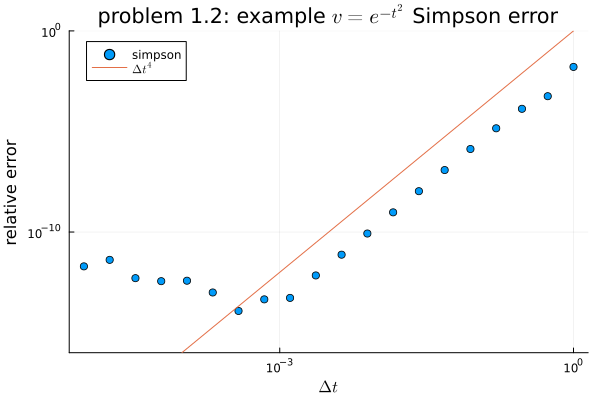

In [1]:
using Plots, LaTeXStrings
Δt = exp10.(range(-5,0,length=20)) # log-spaced points from 10⁻⁵ to 10⁰
v(t) = exp(-t^2)
function simpson_rel_err(v, f, t, Δt)
    tⁿ⁺¹, tⁿ, tⁿ⁻¹ = t + Δt, t, t - Δt
    vⁿ⁺¹, vⁿ, vⁿ⁻¹ = v(tⁿ⁺¹), v(tⁿ), v(tⁿ⁻¹)
    lhs = (vⁿ⁺¹ - vⁿ⁻¹) / 2Δt
    rhs = (f(vⁿ⁺¹,tⁿ⁺¹) + 4f(vⁿ, tⁿ) + f(vⁿ⁻¹,tⁿ⁻¹)) / 6
    return abs(rhs - lhs) / abs(f(vⁿ, tⁿ))
end
rel_err = simpson_rel_err.(t -> exp(-t^2), (v,t) -> -2t*v, 1, Δt)
scatter(Δt, rel_err, xaxis=:log10, yaxis=:log10, label="simpson")
plot!(Δt, Δt.^4, ylim=(1e-16, 1), label=L"\Delta t^4", legend=:topleft,
      title=L"problem 1.2: example $v = e^{-t^2}$ Simpson error", xlabel=L"\Delta t", ylabel="relative error")

**(3)** We already showed in 1.2 that the method is *consistent* (the *local* truncation error $\to 0$ as $\Delta t \to 0$).  By the Dahlquist equivalence theorem, convergence follows as long as the method is **zero stable**.  This corresponds to setting $f = 0$, in which case the recurrence becomes $v^{n+1} = v^{n-1}$, which can be written in matrix form as:
$$
\begin{pmatrix} v^{n+1} \\ v^n \end{pmatrix} = \underbrace{\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}}_A \begin{pmatrix} v^{n} \\ v^{n-1} \end{pmatrix}
$$
which is indeed stable because the matrix $A$ has eigenvalues $\pm 1$ (absolute value $\le 1$).  (In fact, this analysis is identical to the analysis of the midpoint method, from class!)

**(4)** For linear stability, we let $f(v, t) = \lambda v$, which gives the recurrence:
$$
v^{n+1} = v^{n-1} + \frac{\lambda \Delta t}{3} \left[ v^{n+1} + 4v^n + v^{n-1} \right]
$$
which can be solved for $v^{n+1}$ to obtain:
$$
v^{n+1} = \left(1 - \frac{\lambda \Delta t}{3}\right)^{-1} \left[ 4\frac{\lambda \Delta t}{3} v^n + \left(1 + \frac{\lambda \Delta t}{3}\right)  v^{n-1}\right] = \mu_-^{-1} \left[ 4\frac{\lambda \Delta t}{3} v^n + \mu_+ v^{n-1} \right]
$$
letting $\mu_\pm = 1 \pm \frac{\lambda \Delta t}{3}$.  In matrix form:
$$
\begin{pmatrix} v^{n+1} \\ v^n \end{pmatrix} = \underbrace{\begin{pmatrix} 4\frac{\lambda \Delta t}{3 \mu_-} & \frac{\mu_+}{\mu_-} \\ 1 & 0\end{pmatrix}}_{A(\lambda \Delta t)} \begin{pmatrix} v^{n} \\ v^{n-1} \end{pmatrix}
$$
Note that $A(0)$ gives the matrix from the zero-stability analysis, as expected.   Linear stability is obtained when $|\text{eigval}| \le 1$ for all eigenvalues of $A$.  This could be done by hand, since $A$ is a $2\times 2$ matrix whose eigenvalues are obtained from a quadratic formula, but is rather tedious.  Doing it computationally is straightforward, however:

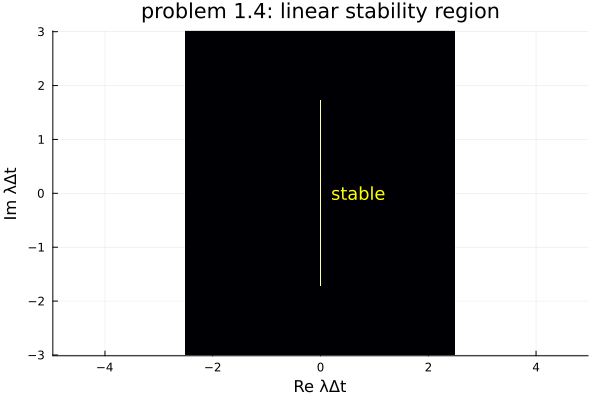

In [2]:
using LinearAlgebra

function Aeig(λΔt)
    μ₊, μ₋ = 1 + λΔt/3, 1 - λΔt/3
    A = [ 4λΔt/3μ₋  μ₊/μ₋
              1       0    ]
    return eigvals(A)
end
Aeigmax(λΔt) = maximum(abs, Aeig(λΔt))

ReλΔt = range(-2.5, 2.5, length=201)
ImλΔt = range(-3, 3, length=201)
Astable = Aeigmax.(complex.(ReλΔt, ImλΔt')) .≤ 1 + 1e-8
heatmap(ReλΔt, ImλΔt, Astable', xlabel="Re λΔt", ylabel="Im λΔt", aspect_ratio=:equal, colorbar=false,
        title="problem 1.4: linear stability region")
annotate!(0.7, 0, ("stable", :yellow, 12))

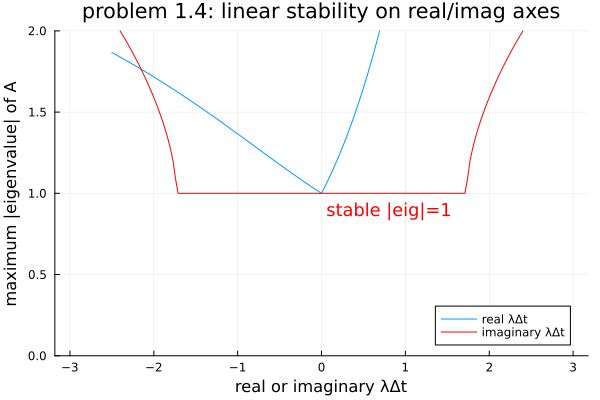

In [3]:
plot(ReλΔt, Aeigmax.(complex.(ReλΔt, 0)), label="real λΔt", ylim=(0,2),
     title="problem 1.4: linear stability on real/imag axes", xlabel="real or imaginary λΔt",
     ylabel="maximum |eigenvalue| of A")
plot!(ImλΔt, Aeigmax.(complex.(0, ImλΔt)), label="imaginary λΔt", color=:red)
annotate!(0.8, 0.9, ("stable |eig|=1", :red, 12))

From the above plot, for a **real λ**, it is *never* stable for *any* $\Delta t > 0$.

However, for an **imaginary λ**, is is stable if $|\operatorname{Im} \lambda \Delta t|$ is sufficiently small.  From the plot,
the threshold value for $|\operatorname{Im} \lambda \Delta t|$ is somewhere between 1 and 2.   It turns out that the threshold
happens when $|\operatorname{Im} \lambda \Delta t|^2 = 3$, as can be seen by plotting the stability vs $|\operatorname{Im} \lambda \Delta t|^2$:

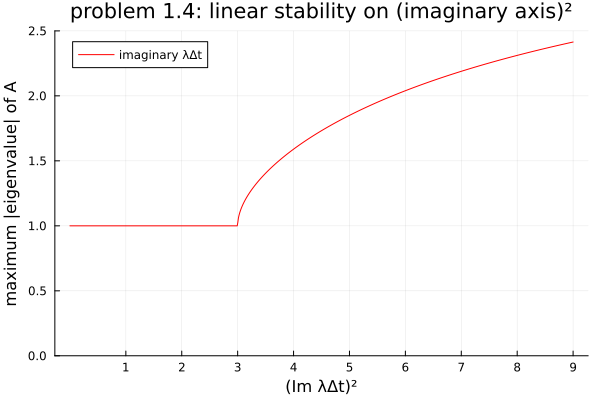

In [4]:
ImλΔt_fine = range(0,3, length=1000)
plot(ImλΔt_fine .^ 2, Aeigmax.(complex.(0, ImλΔt_fine)), label="imaginary λΔt", color=:red,
      title="problem 1.4: linear stability on (imaginary axis)²", xlabel="(Im λΔt)²",
    xticks=1:9, ylim=(0,2.5),
     ylabel="maximum |eigenvalue| of A")

So, for **purely imaginary λ**, it is stable for $\boxed{\Delta t \le \sqrt{3} / |\operatorname{Im} \lambda|}$.

## Problem 2 (5+5+5 points)


Consider the integral
$$
I = \int_{-1}^{1} \sin\left( x - 0.5 \right) \, dx,
$$
which can be recast as the initial value problem (IVP)
$$
\frac{dI}{dx} = \sin\left( x - 0.5 \right), \quad I(-1) = 0.
$$

1. **Forward Euler:**  Discretize the ODE using the Forward Euler method. Compute the integral with $n = 10, 100, 1000$ steps, and analyze the convergence rate by comparing with the exact value.
    
2. **RK4 Method:** Implement the 4th-order Runge-Kutta (RK4) method for the same ODE and compute the integral for $n = 10, 100, 1000$ steps. Compare its accuracy and computational cost with Forward Euler, and determine the observed order of convergence.

3.  Explain why ODE solvers like Forward Euler and RK4 are generally not used for numerical integration, addressing issues of stability, accuracy, and computational efficiency.

### Solution

**(1) and (2)**

We implement Euler's method and RK4 below, and plot the error $I(T) - I$, where $I = \cos(-1.5) - \cos(0.5)$ is the exact integral, versus the number of steps $n$.  You can search online for descriptions of the standard RK4 steps, e.g. [this description from MIT 10.001](https://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node5.html).  Note that the algorithm simplifies quite a bit because we have $dI/dx = f(x)$, where the right-hand-side $f(x)$ does not depend on $I$.

In fact, Euler's method in this case is equivalent to a [rectangle rule (left Riemann sum)](https://en.wikipedia.org/wiki/Riemann_sum), and RK4 in this case is equivalent to [Simpson's quadrature rule](https://en.wikipedia.org/wiki/Simpson%27s_rule).

In [5]:
function euler_integral(f, a, b, n)
    Δx = (b - a) / n
    I = 0.0 # initial condition
    for i = 0:n-1
        I += Δx * f(a + i*Δx) # Euler step = rectangle rule
    end
    return I
end

function rk4_integral(f, a, b, n)
    Δx = (b - a) / n
    I = 0.0 # initial condition
    for i = 0:n-1
        x = a + i*Δx
        k₁ = Δx * f(x)
        k₂ = k₃ = Δx * f(x + Δx/2) # k₂ = k₃ since no I dependence
        k₄ = Δx * f(x + Δx)
        I += (k₁ + 2k₂ + 2k₃ + k₄)/6 # RK4 step = Simpson rule
    end
    return I
end

rk4_integral (generic function with 1 method)

In [6]:
I = cos(-1.5) - cos(0.5) # exact integral
n = 10 .^ (1:6)
euler_err = abs.(euler_integral.(x -> sin(x - 0.5), -1, 1, n) .- I) ./ abs(I)
rk4_err = abs.(rk4_integral.(x -> sin(x - 0.5), -1, 1, n) .- I) ./ abs(I)

euler_err[end], rk4_err[end]

(1.8304873781285464e-6, 2.0640070812059235e-14)

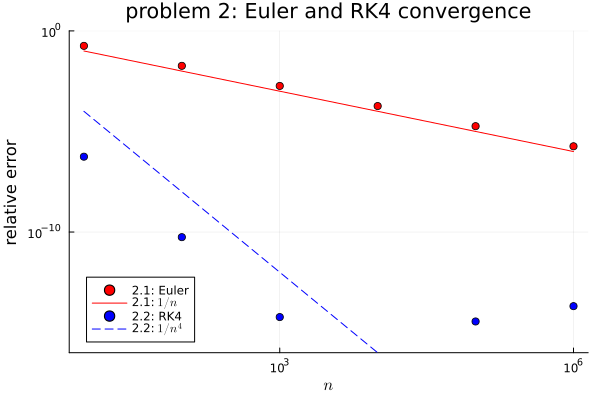

In [7]:
using Plots, LaTeXStrings

scatter(n, euler_err, color=:red, label="2.1: Euler")
plot!(n, 1 ./ n, color=:red, label=L"2.1: $1/n$")
scatter!(n, rk4_err, color=:blue, label="2.2: RK4")
plot!(n, 1 ./ float(n).^4, color=:blue, linestyle=:dash, label=L"2.2: $1/n^4$")

plot!(title="problem 2: Euler and RK4 convergence", xaxis=:log10, yaxis=:log10, 
      xlabel=L"n", ylabel="relative error", legend=:bottomleft, ylim=(1e-16, 1))

What we see is that Euler has $O(1/n)$ (first-order) convergence and RK4 has $O(1/n^4)$ (fourth-order) convergence, as expected.

**(3)** For smooth integrands like this one, we have quadrature algorithms that are **exponentially better** than this, such as Clenshaw–Curtis or Gaussian quadrature, with $O(e^{-\alpha n})$ convergence.  (Actually, for integrating the sine function, they are even faster than exponential because this function is ["entire"](https://en.wikipedia.org/wiki/Entire_function)!)   And we also have quadrature methods that are adaptive, like adaptive ODE methods.  So you are nearly always going to be *far* better off with a specialized quadrature algorithm than treating integration as an initial-value problem.

Why is this?  The basic reason is that **ODEs are generally much harder than quadrature**, because you normally have $dy/dx = f(y,x)$ where the right-hand side depends on the *unknown solution* $y(x)$.   So an ODE solver has no choice but to build up its solution "in sequence" starting at the initial $x$ and then working "forwards" in steps $\Delta x$.    In contrast, if the right-hand side depends *only on x*, as in integration, the quadrature algorithm has much more freedom — it can evaluate the right-hand side at *any set of x values* it wants to, *in any order*.  So they have the freedom to e.g. evaluate the right-hand side at Chebyshev points and then interpolate $f$ to arbitrary order.  ODE methods can't do this.

## Problem 3 (5+5+5 points)

Consider the $5 \times 5$ matrix:
$$
A = \begin{pmatrix}
1 & -1 &  &  &  \\
2 & -1 & 1 &  &  \\
 & 3 & 4 & -2 &  \\
 &  & -2 & 5 & -2 \\
 &  &  & -1 & 3
\end{pmatrix}
$$

**(a)**

Compute (by hand) its LU factorization $A = LU$ via Gaussian elimination (i.e. give both $L$ and $U$).

Notice any special pattern to the nonzero entries?

**(b)** Explain why you will *always* get this pattern of nonzero entries for LU factorization of an $m \times m$ tridiagonal matrix, assuming for simplicity that no row swaps are required.   Show that LU factorization of an $m \times m$ tridiagonal matrix therefore requires $O(m)$ work.

**(c)** Given such an LU factorization of a tridiagonal matrix $A$, explain why solving $Ax =b$ then requires $O(m)$ work (instead of $O(m^2)$ for ordinary LU factors) whereas computing $A^{-1}$ requires $O(m^2)$ work (instead of $O(m^3)$).

### Solutions

**(a)** We perform the Gaussian elimination as usual, but you should quickly notice that it is a *lot* easier than usual because so many of the entries are already zero.  This is quantified in part (c).

We start by multiplying row 1 by 2 and subtracting it from row 2, denoted "$r_2 - 2r_1$", and proceed from there (putting boxes around the pivots and marking the multipliers in red):
$$
A
\stackrel{r_2 - \color{red}{2}r_1}{\longrightarrow}
\begin{pmatrix}
\boxed{1} & -1 &  &  &  \\
 & \boxed{1} & 1 &  &  \\
 & 3 & 4 & -2 &  \\
 &  & -2 & 5 & -2 \\
 &  &  & -1 & 3
\end{pmatrix}
\stackrel{r_3 - \color{red}{3}r_2}{\longrightarrow}
\begin{pmatrix}
\boxed{1} & -1 &  &  &  \\
 & \boxed{1} & 1 &  &  \\
 &  & \boxed{1} & -2 &  \\
 &  & -2 & 5 & -2 \\
 &  &  & -1 & 3.
 \end{pmatrix}
\stackrel{r_4 - \color{red}{(-2)}r_3}{\longrightarrow}
 \begin{pmatrix}
\boxed{1} & -1 &  &  &  \\
 & \boxed{1} & 1 &  &  \\
 &  & \boxed{1} & -2 &  \\
 &  &  & \boxed{1} & -2 \\
 &  &  & -1 & 3
\end{pmatrix}
\stackrel{r_5 - \color{red}{(-1)}r_4}{\longrightarrow}
\boxed{
\underbrace{\begin{pmatrix}
\boxed{1} & -1 &  &  &  \\
 & \boxed{1} & 1 &  &  \\
 &  & \boxed{1} & -2 &  \\
 &  &  & \boxed{1} & -2 \\
 &  &  &  & \boxed{1}
\end{pmatrix}}_U} \, .
$$
(The fact that the pivots all $=1$ is *very unusual* and doesn't happen for most matrices!)

We also need $L$, but as emphasized in class, this requires no computation.
In particular, $L$ has all 1s on its diagonal while the terms below the diagonal are the multipliers coming from the Gaussian elimination process (flipping subtraction to addition). This gives
$$
\boxed{
L=
\begin{pmatrix}
1 &  &  &  &  \\
\color{red}{2} & 1 &  &  &  \\
 &  \color{red}{3}& 1 &  &  \\
 &  &  \color{red}{-2}& 1 & \\
 &  &  &  \color{red}{-1}& 1
 \end{pmatrix} } \, .
$$

The pattern of nonzeros entries in this matrix $A$ is called [tridiagonal](https://en.wikipedia.org/wiki/Tridiagonal_matrix), and such matrices are important in many practical settings.   Moreover, we see that the $L$ and $U$ resulting from Gaussian elimination are [bidiagonal matrices](https://en.wikipedia.org/wiki/Bidiagonal_matrix), which have even fewere nonzero entries.    (These are all examples of structured [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix), which are mostly zero in a regular pattern, and you can often do linear algebra *much* more quickly with such matrices than you could with an arbitrary matrix.)

**(b)** Assuming no row swaps, we will always get this pattern because you only need to **eliminate one element below each diagonal**.   Furthermore, when you subtract the pivot row from the row beneath it, the tridiagonal pattern is preserved: the pivot element cancels the element beneath it, while the nonzero to the right of the pivot combines with the diagonal of the next row.  So **new nonzero entries are never introduced** in the upper triangle of $A$.

Hence, $U$ will always be bidiagonal with one entry above the diagonal: elimination eliminates the entries below the diagonal, and doesn't introduce new entries above the diagonal.   And $L$'s bidiagonal pattern reflects the fact that each pivot  was only subtracted from the row immediately beneath it.

**(c)** The linear $O(m)$ complexity for solving $Ax = b$ can be seen in two steps:

1. Gaussian elimination is $O(m)$, since there is only one row subtraction per column, and this row subtraction only involves two nonzero elements.
2. Back and forward substitution are $O(m)$.  For example, consider forward substitution to solve $Lc = b$: working from top to bottom, since each row of $L$ has only two nonzero entries, each forward-substitution step is an equation with only two terms, which takes $O(1)$ work per row.  Similarly for back-substitution on $Ux = c$, except that we work from bottom to top.

The inverse matrix $A^{-1}$ is generically "dense" (all nonzero) for a tridiagonal matrix.  This is easy to see: even if you start with a right-hand-side consisting of a column of $I$ (with only one nonzero entry), forward substition will make all of the *subsequent* entries nonzero, and then backsubstitution will then make all of the *previous* entries nonzero.   

To *compute* the inverse matrix, we simply need to solve $AX = I$ as usual: perform Gaussian elimination once to get $A = LU$, then perform forward/back-solves on each column of $I$ to get the corresponding column of $X = A^{-1}$.   Unlike a general matrix, however, for a tridiagonal matrix we just showed that $LU$ has $O(m)$ cost, and the forward/back-solves have $O(m)$ cost *per column*, for $O(m^2)$ cost overall.

## Problem 4 (5+5 points)

Consider the matrix
$$
A = \begin{pmatrix} 10^{-100} & 1 \\ 1 & 1 \end{pmatrix} \, .
$$
Suppose we want to solve $Ax = b$ for the right-hand side $b = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$.  The *exact* solution is $x = \frac{1}{1 - 10^{-100}} \begin{pmatrix} -1 \\ 1 \end{pmatrix}$.

**(a)** Solve this $Ax=b$ for $x$ using Gaussian elimination by hand, but pretend you are doing standard floating-point arithmetic: round the result of every arithmetic operation to 16 significant digits.  Perform *no row swaps*: they are not strictly required since $10^{-100} \ne 0$.  Show that the resulting approximate solution $\tilde{x}$ is *completely wrong* compared to the exact solution.

**(b)** On a computer, Gaussian elimination uses "partial pivoting": it swaps rows to make the pivot element as big in magnitude as possible (looking at all the entries under each pivot before doing elimination under each column).  Carry out this algorithm by hand on the same $Ax=b$ above, again rounding the result of each arithmetic operation.  (Note that any row swaps must be performed on both the matrix and the right-hand-side.)  Show that you get a *much more accurate answer*.

This simple example helps explain why partial pivoting is crucial to make Gaussian elimination (i.e. LU factorization) robust in floating-point arithmetic.


### Solution

**(a)** If we carry out Gaussian elimination without row swaps, we only need to do one step, using $10^{-100}$ as the first pivot:
$$
\begin{pmatrix} \boxed{10^{-100}} & 1 \\ 1 & 1 \end{pmatrix}
\stackrel{r_2 - \color{red}{10^{100}}r_1}{\longrightarrow}
\begin{pmatrix} \boxed{10^{-100}} & 1 \\ 0 & 1 - 10^{100}  \end{pmatrix}
\approx
\begin{pmatrix} \boxed{10^{-100}} & 1 \\ 0 & - 10^{100} \end{pmatrix} = \tilde{U}
$$
where we have rounded $1 - 10^{100} \approx - 10^{100}$, since the $1$ only affects the 100th significant digit — this will be lost in 16-digit floating-point arithmetic!

We also do the same row operation to our right-hand side
$$
\begin{pmatrix} 1 \\ 0 \end{pmatrix}
\stackrel{r_2 - \color{red}{10^{100}}r_1}{\longrightarrow}
\begin{pmatrix} 1 \\ - 10^{100} \end{pmatrix} = c
$$

Now, we solve $\tilde{U} \tilde{x} = c$ by back-substitution to get our approximate solution $\tilde{x}$.  The last row gives $- 10^{100} \tilde{x}_2 = - 10^{100} \implies \tilde{x}_2 = 1$.  The first row gives $10^{-100} \tilde{x}_1 + \tilde{x}_2 = 1 \implies  \tilde{x}_1 = 0$, i.e. we get the "solution"
$$
 \tilde{x} = \boxed{\begin{pmatrix} 0 \\ 1 \end{pmatrix} } \, ,
$$
which is **completely wrong** — it is not even close to our exact solution!   A tiny roundoff error in the 100th significant digit has led to catastrophe: this is a symptom of "numerical instability".

We can also reproduce this in Julia, using the `NoPivot()` option to `lu` to prevent pivoting:

In [8]:
A = [1e-100 1
     1      1]
b = [1,0]

x̃ = lu(A, NoPivot()) \ b

2-element Vector{Float64}:
 0.0
 1.0

which indeed is the same *completely wrong* answer.

**(b)** Now, let's try it with "partial pivoting" — at each step, we swap rows to make the pivot as big as possible in magnitude.  Here, clearly $1 > 10^{-100}$ so we will start with a row swap to make $1$ the pivot, and then proceed with Gaussian elimination as usual:
$$
\begin{pmatrix} 10^{-100} & 1 \\ 1 & 1 \end{pmatrix}
\stackrel{r_2 \leftrightarrow r_1}{\longrightarrow}
\begin{pmatrix} \boxed{1} & 1 \\ 10^{-100} & 1 \end{pmatrix}
\stackrel{r_2 - \color{red}{10^{-100}}r_1}{\longrightarrow}
\begin{pmatrix} \boxed{1} & 1 \\ 0 & 1 - 10^{-100} \end{pmatrix}
\approx
\begin{pmatrix} \boxed{1} & 1 \\ 0 & 1 \end{pmatrix} = \hat{U}
$$
where we have rounded $1 - 10^{-100} \approx 1$, since the $10^{-100}$ only affects the 100th significant digit — again, this will be lost in 16-digit floating-point arithmetic.

We also do the same row operation to our right-hand side
$$
\begin{pmatrix} 1 \\ 0 \end{pmatrix}
\stackrel{r_2 \leftrightarrow r_1}{\longrightarrow}
\begin{pmatrix} 0 \\ 1 \end{pmatrix}
\stackrel{r_2 - \color{red}{10^{-100}}r_1}{\longrightarrow}
\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \hat{c}
$$

Finally, we solve $\hat{U} \hat{x} = \hat{c}$ to get our *new* approximate solution $\hat{x}$.  The last row gives $\hat{x}_2 = 1$, and the first row gives $\hat{x}_2 + \hat{x}_2 = 0 \implies \hat{x}_1 = -1$, for an approximate solution of:
$$
\hat{x} = \boxed{ \begin{pmatrix} -1 \\ 1 \end{pmatrix} } \, ,
$$

which is **nearly correct**: it only differs from the exact solution in the 100th significant digits!  A tiny roundoff error during the computations led to only a tiny roundoff error in the solution, which we should have hoped for since the condition number of this $A$ matrix is small.  This is a **numerically stable** algorithm.

In [9]:
cond(A) # condition number of A is small — we should hope for an accurate answer

2.6180339887498953

Indeed, partial pivoting is precisely the algorithm that Julia (and other good-quality linear-algebra libraries) employs:

In [10]:
LU = lu(A) # uses partial pivoting by default
x̂ = LU \ b # accurate answer

2-element Vector{Float64}:
 -1.0
  1.0

In [11]:
LU.p # the row permutation used for this LU factorization

2-element Vector{Int64}:
 2
 1

We can see that Julia indeed swapped the rows, and gave the same (accurate) approximate answer as our hand computation.